# Exploration of audio key features

These features will be extracted from audio files :
+ Tempo ✓
+ Chroma Energy Normalized (CENS) ✓
+ Harmonics and Perceptrual ✓
+ Mel-Frequency Cepstral Coefficients ✓
+ Spectral Centroid ✓
+ Spectral Contrast ✓
+ Spectral Rolloff ✓
+ Spectral Bandwidth ✓
+ Zero Crossing Rate ✓

In [91]:
from playsound import playsound
import librosa
test_file = '../../data/chunk_audio_preview/pop_preview.wav'
y, sr = librosa.load(test_file, sr=None)
#playsound(test_file)


In [92]:
playsound(test_file)

# Explanation and visualization of the differents features

### Tempo (Beats per Minute)

In [93]:
import matplotlib.pyplot as plt
import librosa.display as lplt

tempo, _ = librosa.beat.beat_track(y)
print(f"Estimated tempo : {round(tempo)} BPM")


Estimated tempo : 123 BPM


#### RMS

In [94]:
rms = librosa.feature.rms(y)
print("rms_mean:", np.mean(rms))
print("rms_var:", np.var(rms))

rms_mean: 0.032654982
rms_var: 0.0002442734


## Chroma features

Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.
### Chroma Energy Normalized (CENS)

CENS features are robust to dynamics, timbre and articulation.

(12, 173)


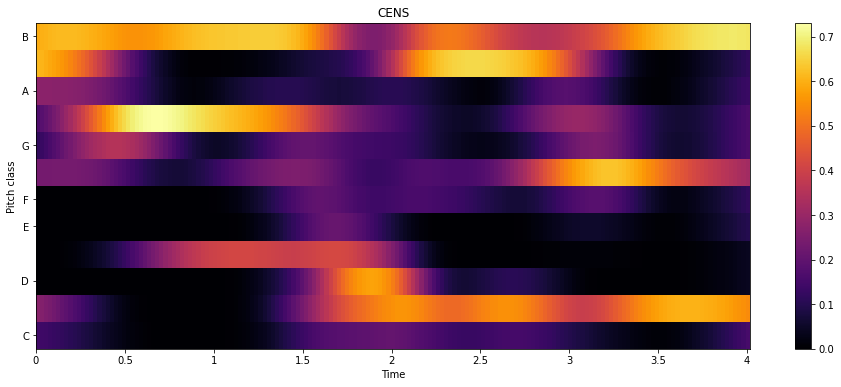

In [95]:
chroma_cens = librosa.feature.chroma_cens(y, sr=sr)
print(chroma_cens.shape)

plt.figure(figsize=(16,6))
lplt.specshow(chroma_cens, sr=sr, x_axis='time', y_axis='chroma', cmap='inferno')
plt.colorbar()
plt.title("CENS")
_ = plt.show()

### Chromagram standard

(12, 173)


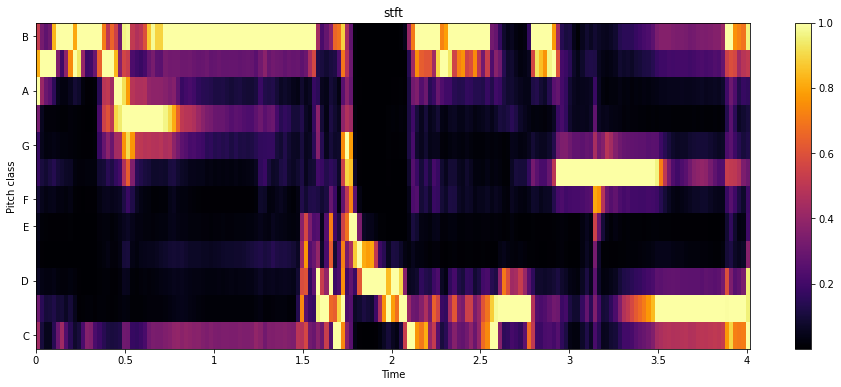

In [96]:
chroma_stft = librosa.feature.chroma_stft(y, sr=sr)
print(chroma_stft.shape)

plt.figure(figsize=(16,6))
lplt.specshow(chroma_stft, sr=sr, x_axis='time', y_axis='chroma', cmap='inferno')
plt.colorbar()
plt.title("stft")
_ = plt.show()

### Harmonics and Perceptrual

+ Harmonics are characteristichs that human ears can't distinguish (represents the sound color)
+ Perceptrual understanding shock wave represents the sound rhythm and emotion

(88200,) (88200,)


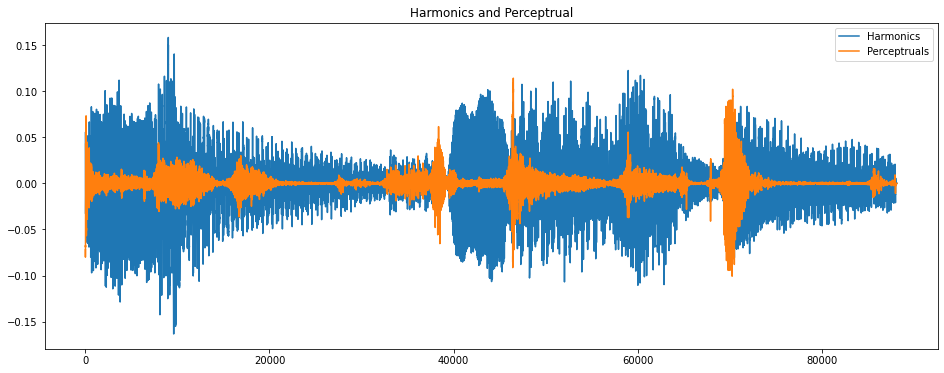

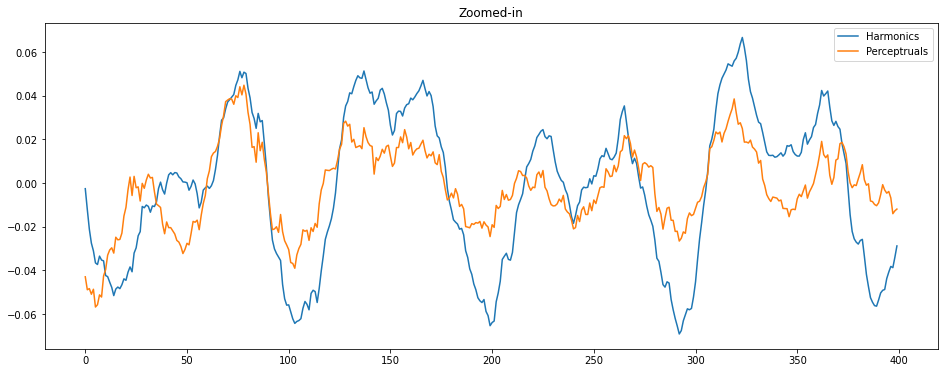

In [97]:
y_harm, y_perc = librosa.effects.hpss(y)
print(y_harm.shape, y_perc.shape)

plt.figure(figsize=(16, 6))
plt.title("Harmonics and Perceptrual")
plt.plot(y_harm)
plt.plot(y_perc)
plt.legend(["Harmonics","Perceptruals"])
_ = plt.show()


plt.figure(figsize=(16, 6))
plt.title("Zoomed-in")
plt.plot(y_harm[100:500])
plt.plot(y_perc[100:500])
plt.legend(["Harmonics", "Perceptruals"])
_ = plt.show()


### Mel-Frequency Cepstral Coefficients

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. 

It models the characteristics of the human voice

(20, 173)


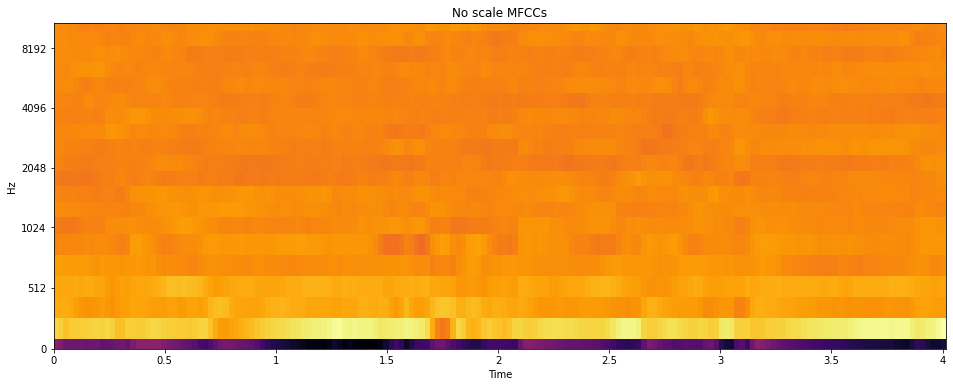

In [98]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)

plt.figure(figsize=(16, 6))
plt.title("No scale MFCCs")
lplt.specshow(mfccs, sr=sr, x_axis='time', y_axis='mel', cmap='inferno')
_ = plt.show()

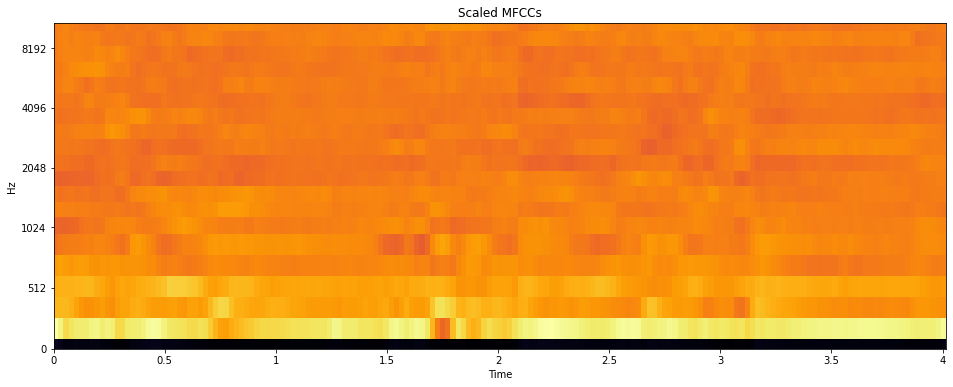

In [99]:
from sklearn.preprocessing import scale
import numpy as np

mfccs_scaled = scale(mfccs.astype(float))
plt.figure(figsize=(16, 6))
plt.title("Scaled MFCCs")
lplt.specshow(mfccs_scaled, sr=sr, x_axis='time', y_axis='mel', cmap='inferno')
_ = plt.show()

### Mel spectrogram

(128, 173)


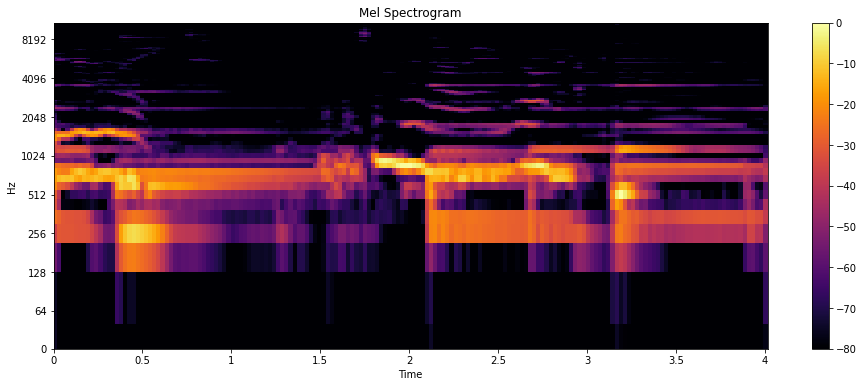

In [100]:
mel_spec = librosa.feature.melspectrogram(y, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
print(mel_spec_db.shape)
plt.figure(figsize=(16, 6))
lplt.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='log', cmap='inferno')
plt.colorbar()
plt.title("Mel Spectrogram")
_ = plt.show()



### Spectral Features
+ Spectral Centroid :

Indicates at which frequency the energy of a spectrum is centered upon

+ Spectral Rolloff :
  
It represents the frequency below which a specified percentage of the total spectral energy lies

+ Spectral Bandwith :
  
Bandwidth of the signal

Centroids mean: 1614.6485002344812
Centroids var: 696982.974026214
Rolloff mean: 3534.9304552023123
Rolloff var: 3252674.7924065734
Bandwith mean: 2294.8372340487936
Bandwith var: 253230.3739803182
Contrast mean: 24.8947344075557
Contrast var: 32.604334287778656
Shape of Spectral Centroids: (173,)
Shape of Spectral Rolloff: (173,)
Shape of Spectral Bandwith: (173,)
Shape of Spectral Contrast: (173,)


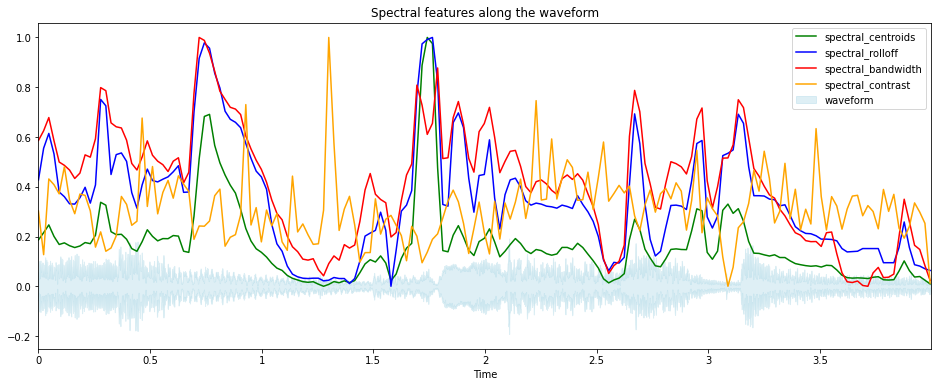

In [101]:
from sklearn.preprocessing import minmax_scale

# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]
spectral_bandwidth = librosa.feature.spectral_bandwidth(y, sr=sr)[0]
spectral_contrast= librosa.feature.spectral_contrast(y, sr=sr)[0]

# Shape is a vector
print('Centroids mean:', np.mean(spectral_centroids))
print('Centroids var:', np.var(spectral_centroids))
print('Rolloff mean:', np.mean(spectral_rolloff))
print('Rolloff var:', np.var(spectral_rolloff))
print('Bandwith mean:', np.mean(spectral_bandwidth))
print('Bandwith var:', np.var(spectral_bandwidth))
print('Contrast mean:', np.mean(spectral_contrast))
print('Contrast var:', np.var(spectral_contrast))
print('Shape of Spectral Centroids:', spectral_centroids.shape)
print('Shape of Spectral Rolloff:', spectral_rolloff.shape)
print('Shape of Spectral Bandwith:', spectral_bandwidth.shape)
print('Shape of Spectral Contrast:', spectral_contrast.shape)

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)
labels = [
    "spectral_centroids", 
    "spectral_rolloff",
    "spectral_bandwidth", 
    "spectral_contrast", 
    "waveform"
]

plt.figure(figsize=(16, 6))
plt.title('Spectral features along the waveform')
lplt.waveplot(y, sr=sr, alpha=0.4, color='lightblue')
plt.plot(t, minmax_scale(spectral_centroids), color='g')
plt.plot(t, minmax_scale(spectral_rolloff), color='b')
plt.plot(t, minmax_scale(spectral_bandwidth), color='r')
plt.plot(t, minmax_scale(spectral_contrast), color='orange')
plt.legend(labels)
_ = plt.show()


### Fourier Transform
+ Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
+ Transform both the y-axis (frequency) to log scale, and the 'color' axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

Shape of stft object: (1025, 173)


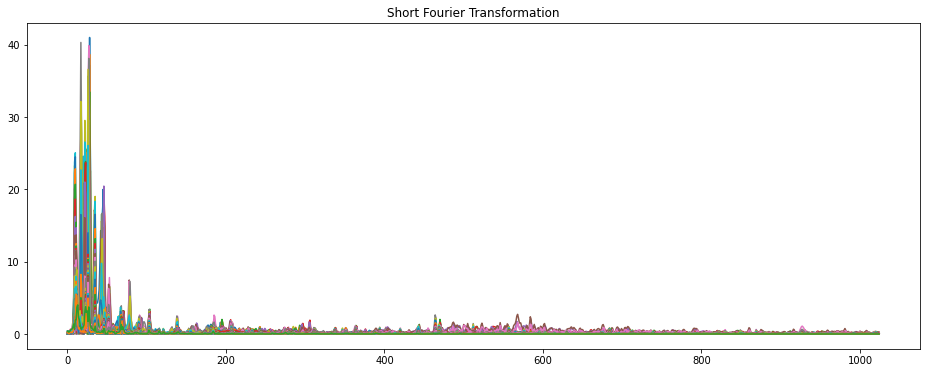

In [102]:
stft = np.abs(librosa.stft(y))

print('Shape of stft object:', stft.shape)
plt.figure(figsize=(16, 6))
plt.plot(stft)
plt.title("Short Fourier Transformation")
_ = plt.show()


### Zero Crossing Rate¶
the rate at which the signal changes from positive to negative or back.

In [103]:
zero_crossings = librosa.zero_crossings(y, pad=False)
print(sum(zero_crossings))


4136
